In [1]:
import os
import pandas as pd

In [2]:
data_dir="E:\Work\Machine Learning Course\Python\Module 4 Tree Based Models\Data"

In [3]:
os.chdir(data_dir)

In [4]:
dat=pd.read_csv("credit_history.csv")
dat.isnull().sum()

default        0
amount         0
grade          0
years        279
ownership      0
income         0
age            0
dtype: int64

In [5]:
dat['years'].describe()

count    7448.000000
mean        6.086332
std         6.700758
min         0.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        62.000000
Name: years, dtype: float64

In [6]:
dat['years'].fillna(4,inplace=True)

In [7]:
X=dat.drop("default",axis=1)

In [8]:
X.head()

,amount,grade,years,ownership,income,age
0,1000,B,2.0,RENT,19200.0,24
1,6500,A,2.0,MORTGAGE,66000.0,28
2,2400,A,2.0,RENT,60000.0,36
3,10000,C,3.0,RENT,62000.0,24
4,4000,C,2.0,RENT,20000.0,28


In [9]:
X=pd.get_dummies(X)

In [10]:
X.head()

,amount,years,income,age,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,ownership_MORTGAGE,ownership_OTHER,ownership_OWN,ownership_RENT
0,1000,2.0,19200.0,24,0,1,0,0,0,0,0,0,0,0,1
1,6500,2.0,66000.0,28,1,0,0,0,0,0,0,1,0,0,0
2,2400,2.0,60000.0,36,1,0,0,0,0,0,0,0,0,0,1
3,10000,3.0,62000.0,24,0,0,1,0,0,0,0,0,0,0,1
4,4000,2.0,20000.0,28,0,0,1,0,0,0,0,0,0,0,1


In [11]:
y=dat['default']

In [12]:
import sklearn.model_selection as model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=200)

In [13]:
import sklearn.tree as tree
clf=tree.DecisionTreeClassifier(max_depth=3,random_state=200)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.62742561448900391

In [15]:
clf.classes_

array([0, 1], dtype=int64)

In [14]:
clf.predict_proba(X_test)

array([[ 0.7838765 ,  0.2161235 ],
       [ 0.7838765 ,  0.2161235 ],
       [ 0.866171  ,  0.133829  ],
       ..., 
       [ 0.33271144,  0.66728856],
       [ 0.62803532,  0.37196468],
       [ 0.49720149,  0.50279851]])

In [16]:
import sklearn.metrics as metrics
metrics.roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])

0.67212508203527865

In [17]:
import pydotplus
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
os.chdir(data_dir)

In [18]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,  
                         class_names=["0","1"],  
                         filled=True, rounded=True,  
                         special_characters=True,proportion=True)

In [19]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label=<grade_A &le; 0.5<br/>gini = 0.499<br/>samples = 100.0%<br/>value = [0.525, 0.475]<br/>class = 0>, fillcolor="#e5813918"] ;\n1 [label=<grade_B &le; 0.5<br/>gini = 0.495<br/>samples = 73.0%<br/>value = [0.452, 0.548]<br/>class = 1>, fillcolor="#399de52d"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=<income &le; 64996.0<br/>gini = 0.466<br/>samples = 41.0%<br/>value = [0.37, 0.63]<br/>class = 1>, fillcolor="#399de56a"] ;\n1 -> 2 ;\n3 [label=<gini = 0.444<br/>samples = 26.0%<br/>value = [0.333, 0.667]<br/>class = 1>, fillcolor="#399de580"] ;\n2 -> 3 ;\n4 [label=<gini = 0.491<br/>samples = 15.0%<br/>value = [0.434, 0.566]<br/>class = 1>, fillcolor="#399de53c"] ;\n2 -> 4 ;\n5 [label=<income &le; 55981.5<br/>gini = 0.493<br/>samples = 32.0%<br/>value = [0.557, 0.443]<br/>class = 0>, fillcolor="#e5813934"] ;\n1 -> 5 ;\n6 [label=<

In [20]:
graph = pydotplus.graph_from_dot_data(dot_data)

In [21]:
from IPython.display import Image

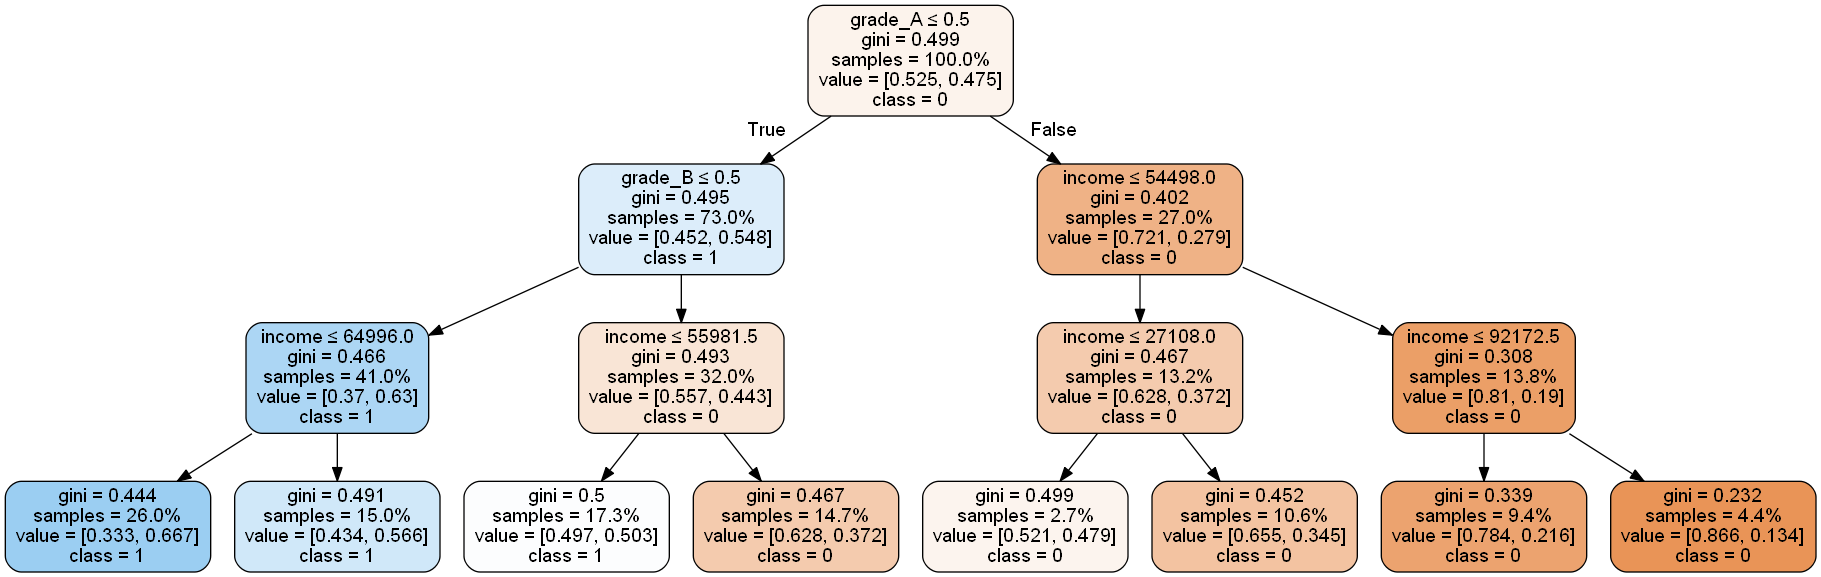

In [22]:
Image(graph.create_png())

### Grid Search-Cross Validation

In [23]:
clf=tree.DecisionTreeClassifier(max_depth=3,random_state=200)

In [24]:
mod=model_selection.GridSearchCV(clf,param_grid={'max_depth':[2,3,4,5,6]})
mod.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=200,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [25]:
mod.best_params_

{'max_depth': 2}

In [26]:
mod.best_score_

0.63145122148519661

In [27]:
mod_f=tree.DecisionTreeClassifier(max_depth=2).fit(X_train,y_train)

In [31]:
import rules as rules

In [32]:
rules.print_decision_tree(mod_f,X.columns)

if ( grade_A <= 0.5 ) {
    if ( grade_B <= 0.5 ) {
        return [[  936.  1597.]]
    } else {
        return [[ 1102.   876.]]
    }
} else {
    if ( income <= 54498.0 ) {
        return [[ 514.  304.]]
    } else {
        return [[ 690.  162.]]
    }
}


In [33]:
dot_data = tree.export_graphviz(mod_f, out_file=None, 
                         feature_names=X.columns,  
                         class_names=["0","1"],  
                         filled=True, rounded=True,  
                         special_characters=True,proportion=False)

In [34]:
graph = pydotplus.graph_from_dot_data(dot_data)

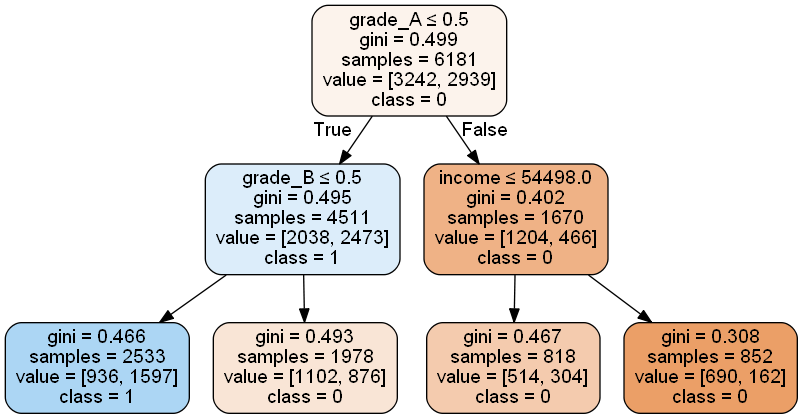

In [35]:
Image(graph.create_png())

In [30]:
os.chdir("E:\Work\Python\PythonTrainings\PythonForModellers\Codes")